$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 4 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss


----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('prepared_train_data .csv')
test = pd.read_csv('prepared_test_data.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [4]:
df_train = train.copy()
df_train

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,...,10,11,12,13,14,0.1,1.1,2.1,0.2,0.3
0,42.0,56370.980,3,-100.0,18.0,2.0,726.60,18.1,180.810295,260.009010,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,28.0,15806.695,6,2.0,12.0,10.0,1204.86,31.4,18.137630,324.928159,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,36.0,19744.640,34,3.0,17.0,13.0,1262.89,17.9,28.521276,296.752799,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0
3,38.0,61648.240,15,8.0,33.0,18.0,4129.59,3.4,358.996715,181.757565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
4,38.0,139664.960,12,4.0,14.0,12.0,365.66,30.0,423.731016,182.547539,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46505,37.0,70709.040,20,6.0,9.0,15.0,805.64,16.1,260.883512,320.670329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
46506,23.0,31795.080,23,7.0,33.0,16.0,2053.98,8.3,360.768878,195.139674,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46507,36.0,101316.640,9,3.0,16.0,18.0,559.18,18.4,166.272881,411.553626,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0
46508,28.0,79649.310,9,3.0,14.0,12.0,821.35,27.9,12426.000000,665.837625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0


In [5]:
#this data is prepared for the model


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hints:
- It could be helpful to check `sklearn.preprocessing` module.
- Remember that Support Vector Machine classifiers require special preprocessing.

In [6]:
x_train= df_train.iloc[:,:-1]
y_train= pd.DataFrame(df_train.iloc[:,-1])

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [8]:
df_test = test.copy()
df_test

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,...,10,11,12,13,14,0.1,1.1,2.1,0.2,0.3
0,18.0,18888.46,18,7.0,50.0,19.0,1543.58,14.1,69.043340,252.578696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,34.0,68183.84,27,7.0,31.0,22.0,3341.21,11.5,201.161510,403.873469,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,23.0,39447.48,31,6.0,25.0,12.0,1924.32,14.9,194.422237,43.237271,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35.0,36857.22,14,2.0,19.0,12.0,1911.65,10.1,56.042521,170.966996,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,28.0,33787.30,34,6.0,44.0,15.0,2813.15,7.1,101.553158,375.547953,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19825,27.0,10494.44,7,6.0,14.0,11.0,2579.62,15.4,46.160211,294.909596,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19826,19.0,52797.30,33,5.0,60.0,17.0,2563.97,6.4,209.932888,121.005455,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19827,21.0,16944.54,16,0.0,17.0,20.0,1066.99,32.4,0.000000,349.141610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
19828,55.0,107677.98,12,2.0,11.0,9.0,877.65,25.8,99.790794,141.859277,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
x_test= df_test.iloc[:,:-1]


In [10]:
y_test= pd.DataFrame(df_test.iloc[:,-1])


----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.LinearSVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [11]:
class_names = ['Poor', 'Standard', 'Good']
y_train.columns = y_train.columns.astype(str)
y_train = np.ravel(y_train)

model = LinearSVC (random_state=1234, max_iter= 30000).fit(x_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
class_weights={0.0: 1, 1.0 :1, 2.0 :100}

In [13]:
y_train


array([0., 2., 0., ..., 1., 2., 1.])

In [14]:
model2= LinearSVC (random_state=1234, max_iter= 30000, class_weight= 'balanced' ).fit(x_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [15]:
print(classification_report(y_train, model.predict(x_scaled), target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Poor     0.5729    0.3738    0.4524     13514
    Standard     0.5647    0.8471    0.6776     24768
        Good     0.5512    0.0360    0.0675      8228

    accuracy                         0.5661     46510
   macro avg     0.5629    0.4190    0.3992     46510
weighted avg     0.5647    0.5661    0.5043     46510



In [16]:
print(classification_report(y_train, model2.predict(x_scaled), target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Poor     0.5996    0.5409    0.5687     13514
    Standard     0.6796    0.4934    0.5717     24768
        Good     0.3840    0.7623    0.5107      8228

    accuracy                         0.5548     46510
   macro avg     0.5544    0.5989    0.5504     46510
weighted avg     0.6040    0.5548    0.5601     46510



----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.SVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$
- `kernel` = 'linear'

In [17]:
from sklearn.svm import SVC

model_kernel = svm.SVC(kernel='linear',random_state=1234, max_iter= 10000,gamma='auto', class_weight= class_weights ).fit(x_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Q` Which metric is more reliable?
`Q` Compare the results to those of `sklearn.svm.LinearSVC` class. Also, is there a difference in the training time?

In [18]:
print(classification_report(y_train, model_kernel.predict(x_scaled), target_names=class_names, digits=4, zero_division =0))

              precision    recall  f1-score   support

        Poor     0.4429    0.3726    0.4047     13514
    Standard     0.5244    0.0672    0.1191     24768
        Good     0.2221    0.8632    0.3534      8228

    accuracy                         0.2967     46510
   macro avg     0.3965    0.4343    0.2924     46510
weighted avg     0.4473    0.2967    0.2435     46510



In [23]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_train, model_kernel.predict(x_scaled))
cm

array([[ 5035,  1152,  7327],
       [ 5563,  1664, 17541],
       [  769,   357,  7102]])

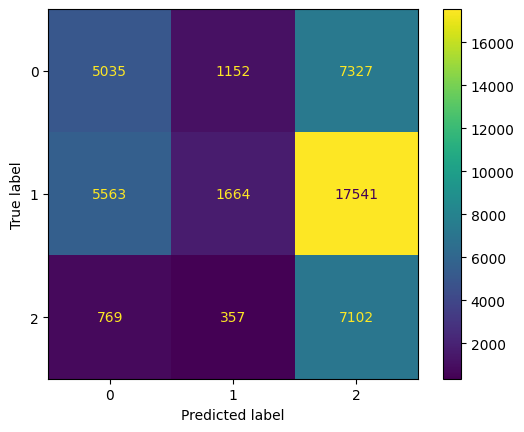

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$ parameter(s) for simplicity if you want. Does kernelization make the model better?

Which of the two kernels performs better?

In [20]:
model_kernel_poly = svm.SVC(kernel='poly',random_state=1234, max_iter= -1).fit(x_scaled,y_train)

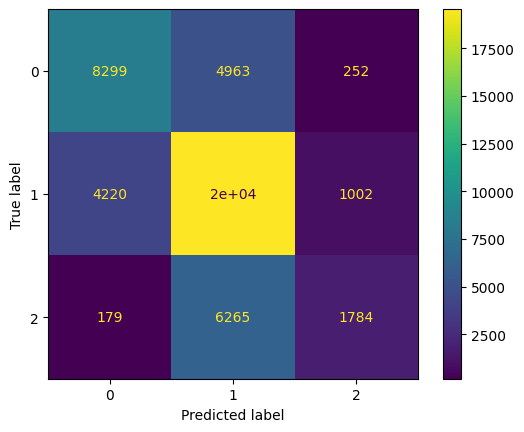

In [25]:
cm_poly= confusion_matrix(y_train, model_kernel_poly.predict(x_scaled))
cm_poly_display = ConfusionMatrixDisplay(cm_poly).plot()

In [27]:
print(classification_report(y_train, model_kernel_poly.predict(x_scaled), target_names=class_names, digits=4, zero_division =0))

              precision    recall  f1-score   support

        Poor     0.6536    0.6141    0.6332     13514
    Standard     0.6351    0.7892    0.7038     24768
        Good     0.5872    0.2168    0.3167      8228

    accuracy                         0.6370     46510
   macro avg     0.6253    0.5400    0.5513     46510
weighted avg     0.6320    0.6370    0.6148     46510



In [21]:
model_kernel_rbf = svm.SVC(kernel='rbf',random_state=1234, max_iter= -1).fit(x_scaled,y_train)

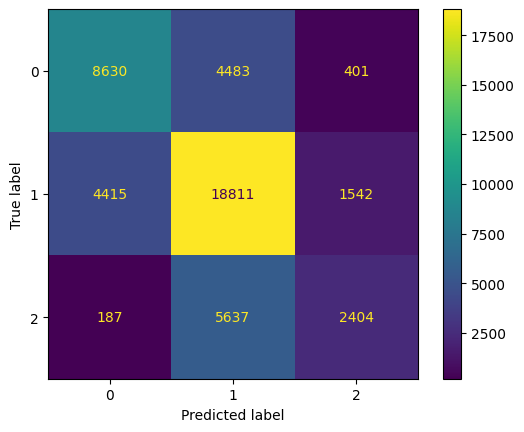

In [26]:
cm_rbf= confusion_matrix(y_train, model_kernel_rbf.predict(x_scaled))
cm_rbf_display = ConfusionMatrixDisplay(cm_rbf).plot()

In [28]:
print(classification_report(y_train, model_kernel_rbf.predict(x_scaled), target_names=class_names, digits=4, zero_division =0))

              precision    recall  f1-score   support

        Poor     0.6522    0.6386    0.6453     13514
    Standard     0.6502    0.7595    0.7006     24768
        Good     0.5530    0.2922    0.3823      8228

    accuracy                         0.6417     46510
   macro avg     0.6185    0.5634    0.5761     46510
weighted avg     0.6336    0.6417    0.6282     46510



## `iv` Tuning Hyperparameters

Try different  $C, \gamma, \space and/or \space degree$ values and evaluate. What is the best hyperparamters value combination?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` Make sure to tune only relevant hyperparameters per kernel (e.g., don't tune different values for `degree` while using `rbf` kernel)

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [31]:
from sklearn.model_selection import RandomizedSearchCV


Model = svm.SVC()

param_grid = { 'gamma':['scale','auto'] ,'C':[.00005,.0005,0.005,0.002,.001,0.01], 'kernel':['linear', 'poly', 'rbf'],'decision_function_shape': ['ovo', 'ovr']}

# Create the grid search with cross-validation

random_search = RandomizedSearchCV (estimator=Model, param_distributions= param_grid, cv=5)
random_search.fit(x_scaled, y_train)
best_params = random_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'decision_function_shape': 'ovo', 'C': 0.005}


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [36]:
x_test_scaled = scaler.transform(x_test)

In [43]:
print(classification_report(y_test, random_search.best_estimator_.predict(x_test_scaled) , target_names=class_names, digits=4, zero_division =0))

              precision    recall  f1-score   support

        Poor     0.5897    0.4267    0.4951      5770
    Standard     0.5679    0.8428    0.6785     10548
        Good     0.0000    0.0000    0.0000      3512

    accuracy                         0.5725     19830
   macro avg     0.3859    0.4232    0.3912     19830
weighted avg     0.4736    0.5725    0.5050     19830



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$